In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
from jupyfun import sorted_filenames
from nbtools import auto_plot_style

In [2]:
%matplotlib inline

auto_plot_style()

# Pixel

In [3]:
folder = "/home/gonzalo/data/PET/pixel_response_map/crystal/data/"
filenames = sorted_filenames(folder, "*.parquet")

In [4]:
nemitted = 90e3
binsize_x = 0.3
binsize_y = binsize_x
binsize_z = 4

In [5]:
data = pd.concat([pd.read_parquet(filename) for filename in filenames], ignore_index=True)
data = data.assign( r     = np.sqrt(data.x**2 + data.y**2)
                  , x_bin = (np.abs(data.x) // binsize_x).astype(int)
                  , y_bin = (np.abs(data.y) // binsize_y).astype(int)
                  , z_bin = (np.abs(data.z) // binsize_z).astype(int))

In [6]:
data.describe()

,x,y,z,sipm_0,r,x_bin,y_bin,z_bin
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.001327,-0.002380,-18.577759,25471.534086,2.295036,4.496616,4.501661,4.155247
std,1.731218,1.731967,10.738398,14852.154779,0.854187,2.872068,2.868266,2.689102
min,-3.000000,-3.000000,-37.199993,0.000000,0.006860,0.000000,0.000000,0.000000
25%,-1.498167,-1.504645,-27.886241,13613.000000,1.691294,2.000000,2.000000,2.000000
50%,-0.003329,-0.003358,-18.572380,20061.000000,2.392084,4.000000,5.000000,4.000000
75%,1.496779,1.498608,-9.269894,34381.000000,2.930896,7.000000,7.000000,6.000000
max,3.000000,2.999989,-0.000021,65535.000000,4.239192,9.000000,9.000000,9.000000


In [7]:
center = data.loc[data.r < 0.3]

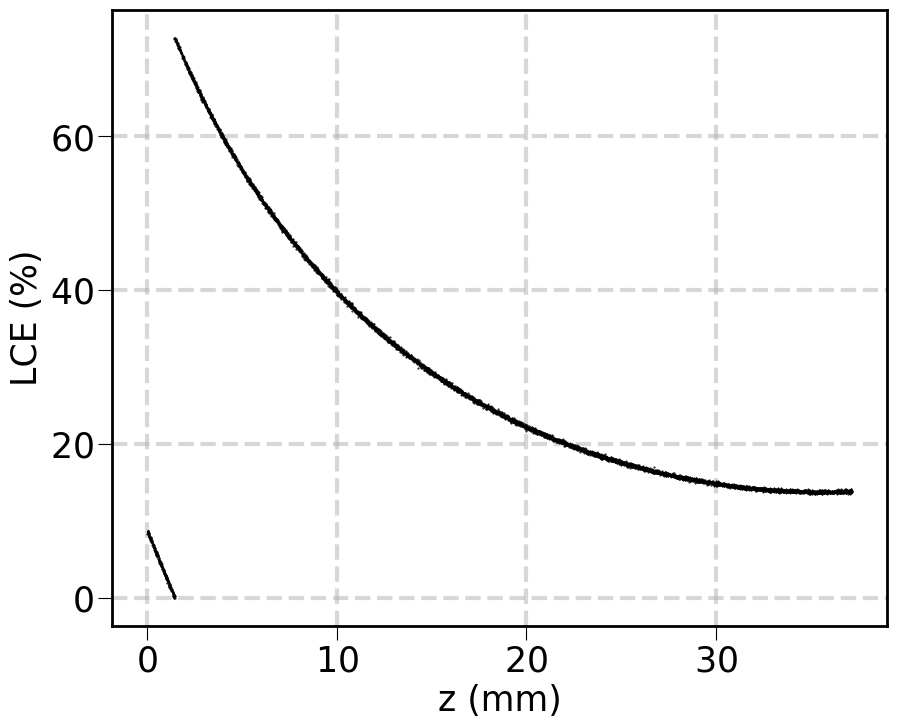

In [14]:
plt.plot(-center.z, 100 * ((center.sipm_0.astype(float) + 2*nemitted) % nemitted)/nemitted, "k.", ms=1)
plt.xlabel("z (mm)")
plt.ylabel("LCE (%)")
plt.grid()

In [9]:
binned = (data.groupby("x_bin y_bin z_bin".split())
              .agg(dict(sipm_0 = "mean", r = "mean", x = "count"))
              .reset_index()
              .rename(columns=dict(x = "nevents"))
              .assign( x = lambda df: (df.x_bin + 0.5) * binsize_x
                     , y = lambda df: (df.y_bin + 0.5) * binsize_y
                     , z = lambda df: (df.z_bin + 0.5) * binsize_z)
         )

In [10]:
binned.describe()

,x_bin,y_bin,z_bin,sipm_0,r,nevents,x,y,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.500000,4.500000,4.500000,24526.727070,2.295714,900.000000,1.500000,1.500000,20.000000
std,2.873719,2.873719,2.873719,12162.376247,0.850700,206.805848,0.862116,0.862116,11.494874
min,0.000000,0.000000,0.000000,11989.062016,0.225588,244.000000,0.150000,0.150000,2.000000
25%,2.000000,2.000000,2.000000,13334.497325,1.710101,937.000000,0.750000,0.750000,10.000000
50%,4.500000,4.500000,4.500000,20033.592608,2.373357,963.000000,1.500000,1.500000,20.000000
75%,7.000000,7.000000,7.000000,35672.362085,2.906826,987.000000,2.250000,2.250000,30.000000
max,9.000000,9.000000,9.000000,48753.950265,4.037532,1092.000000,2.850000,2.850000,38.000000


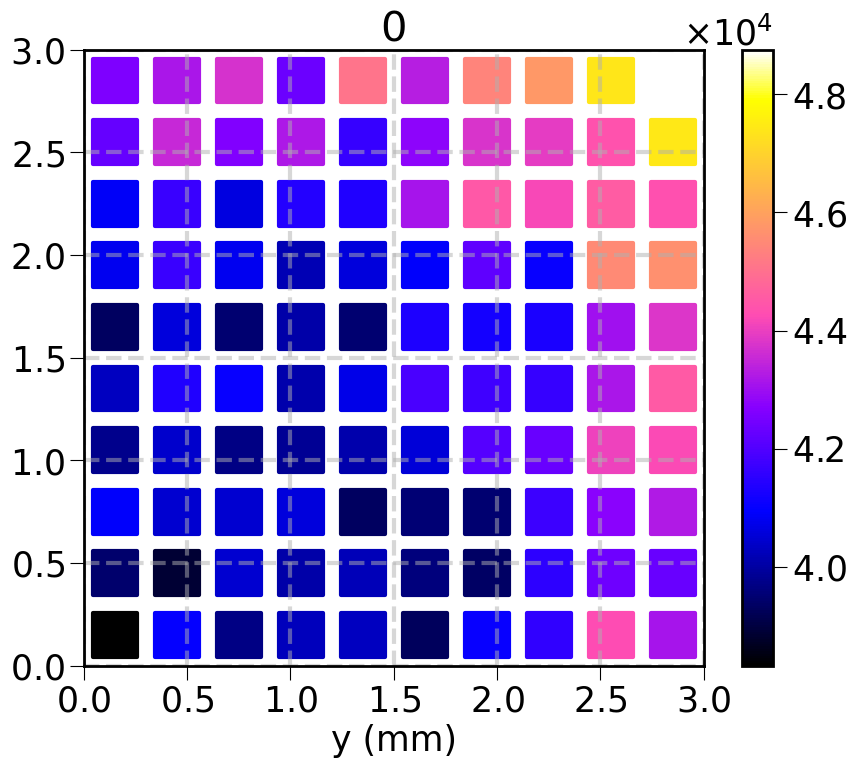

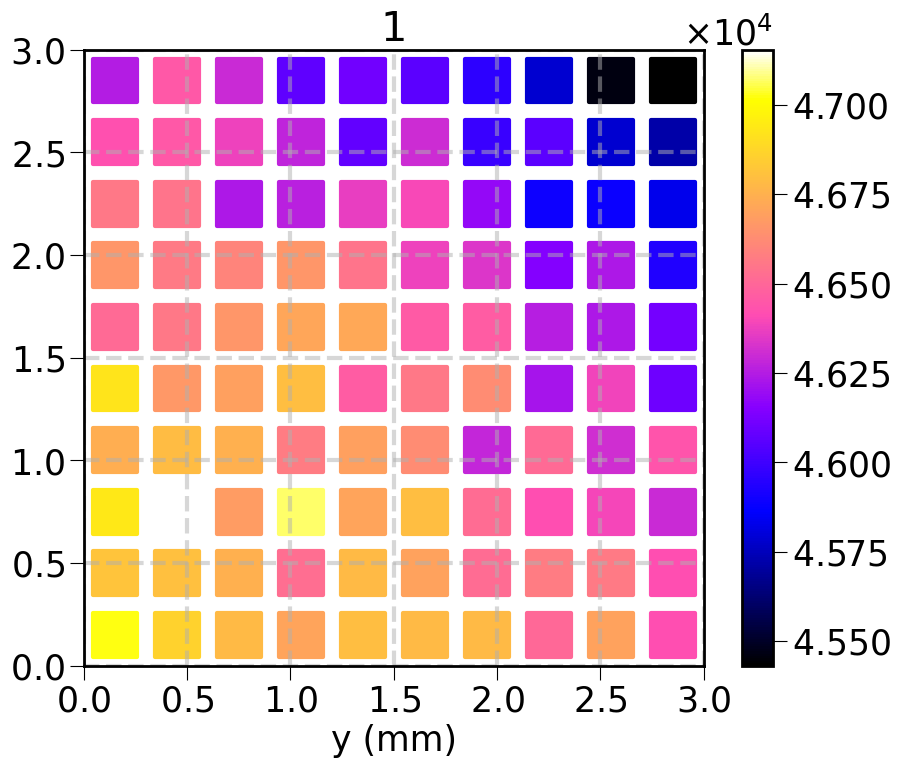

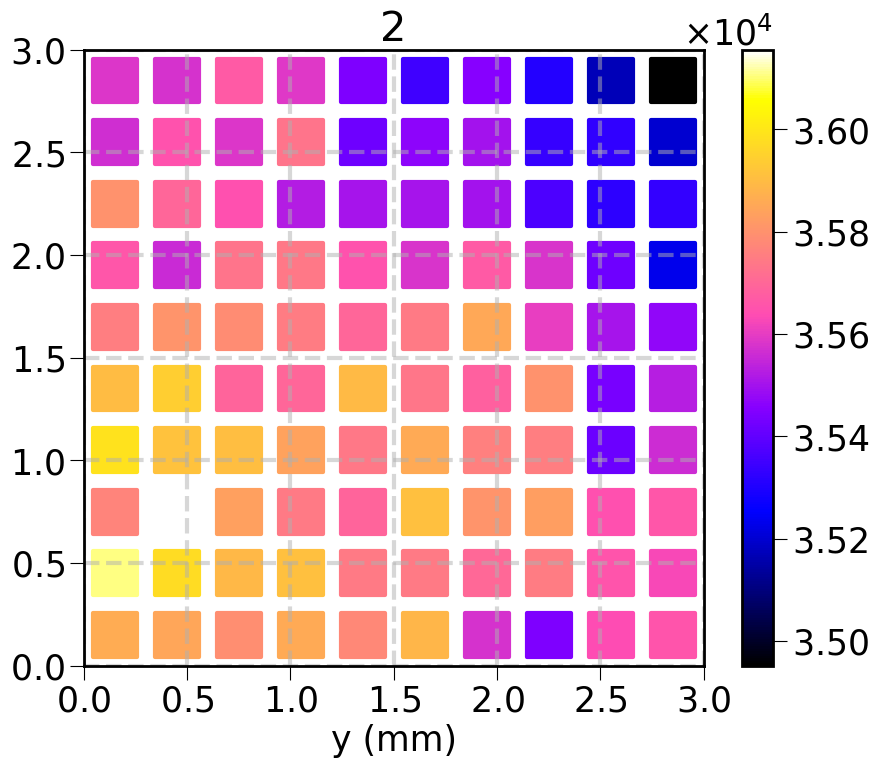

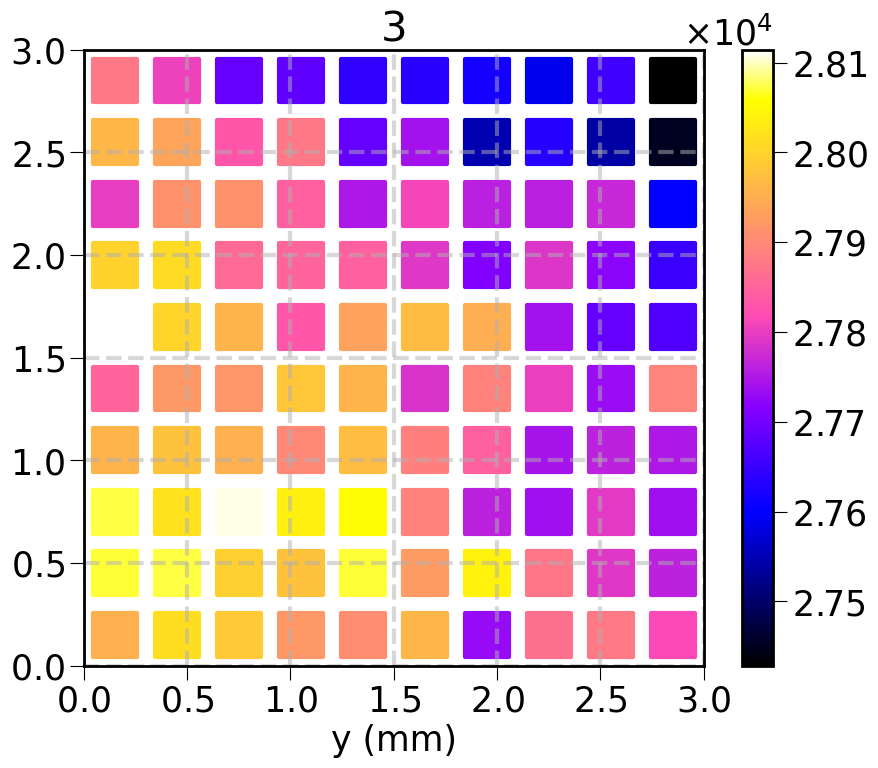

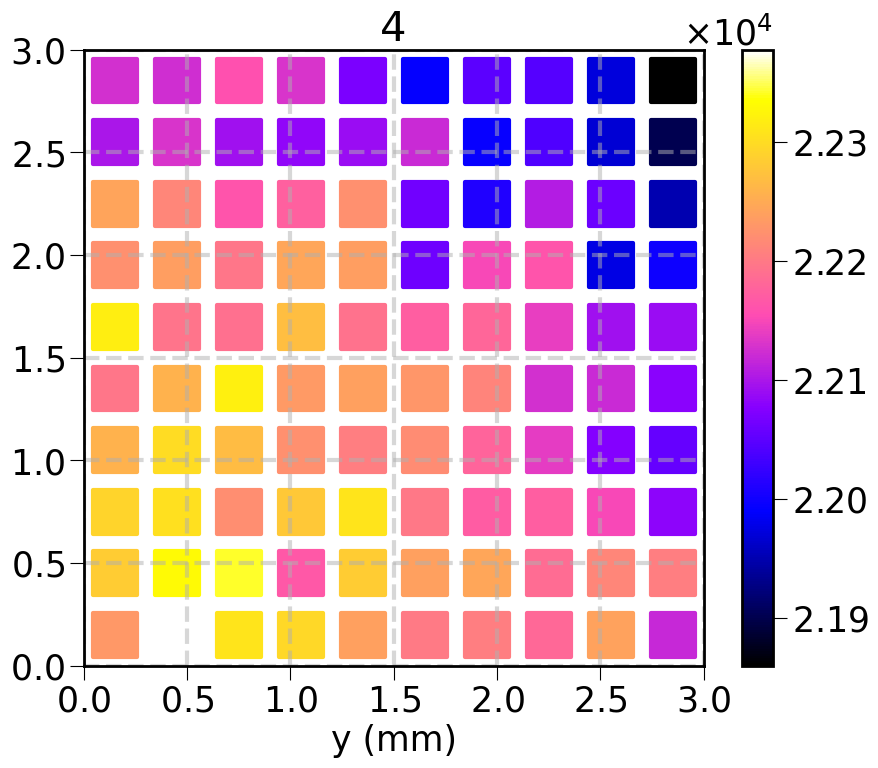

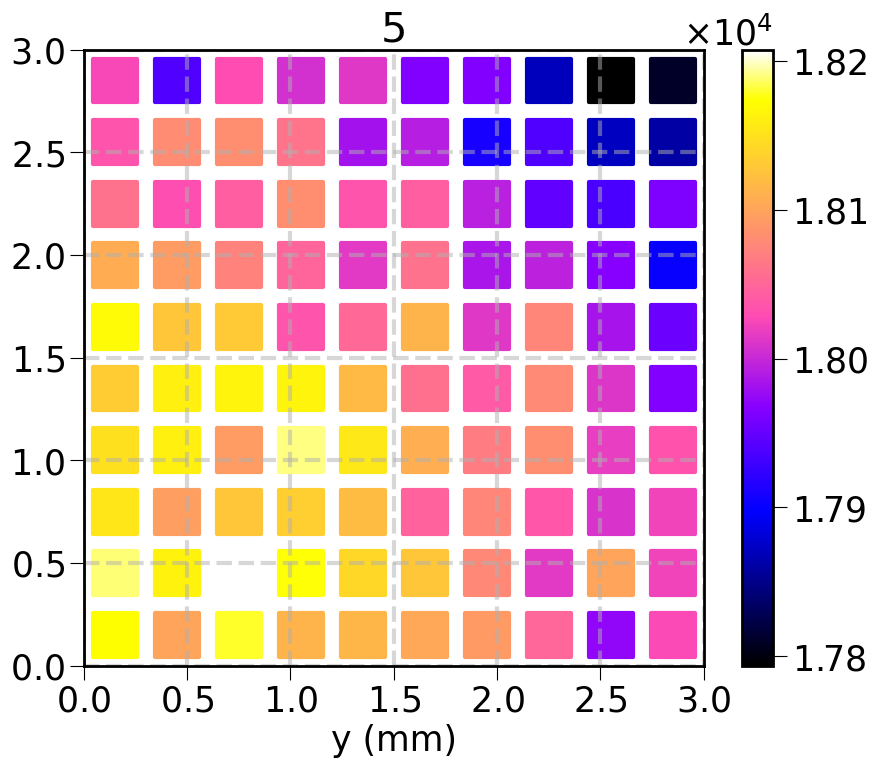

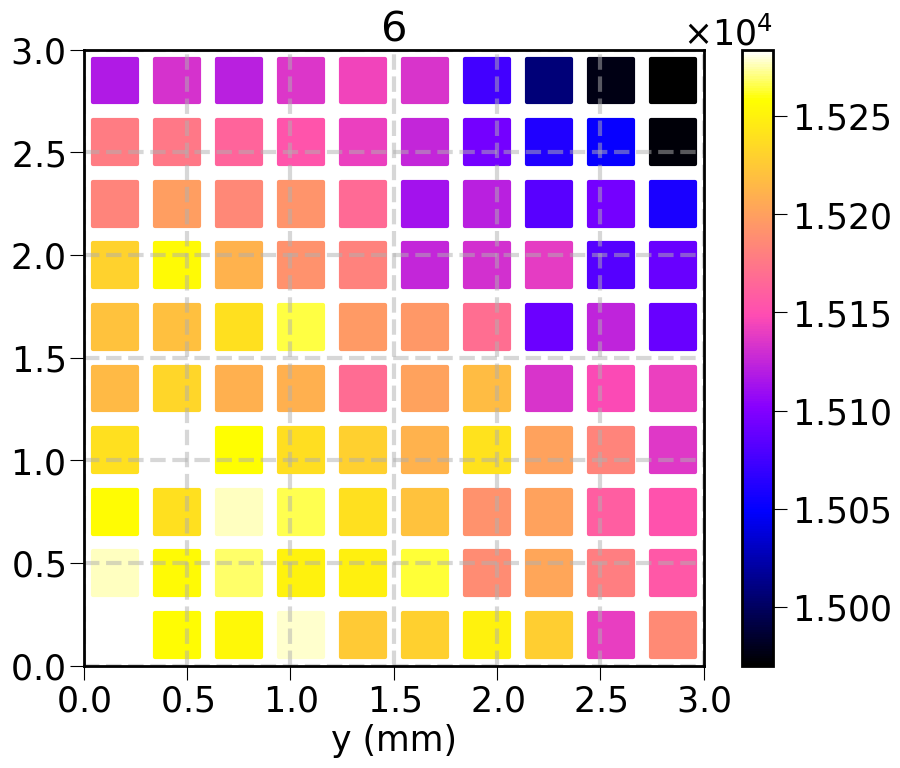

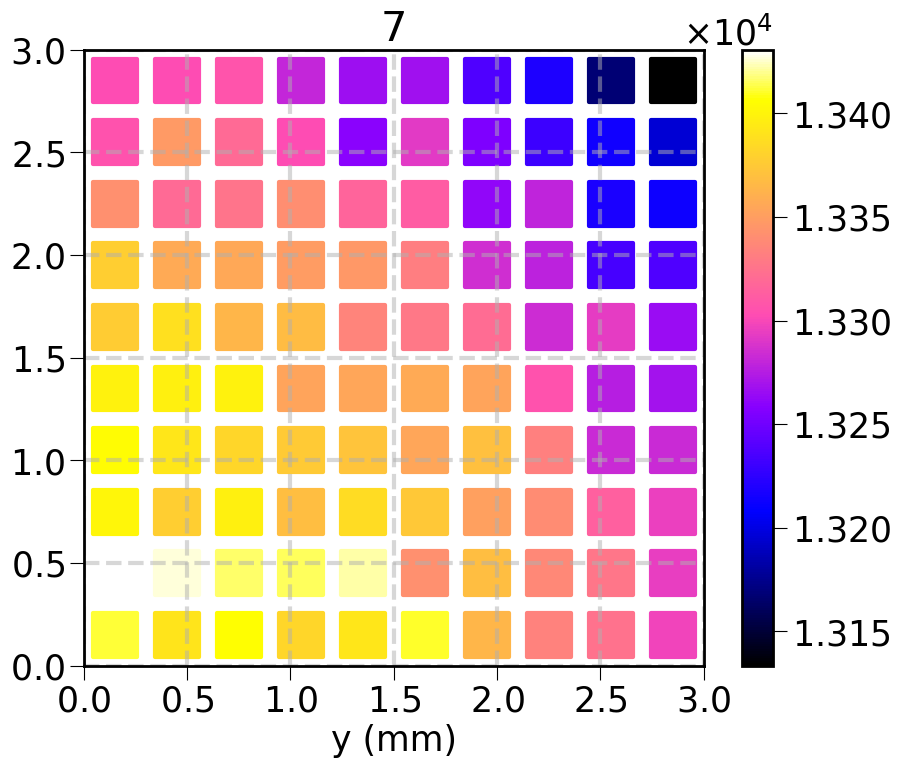

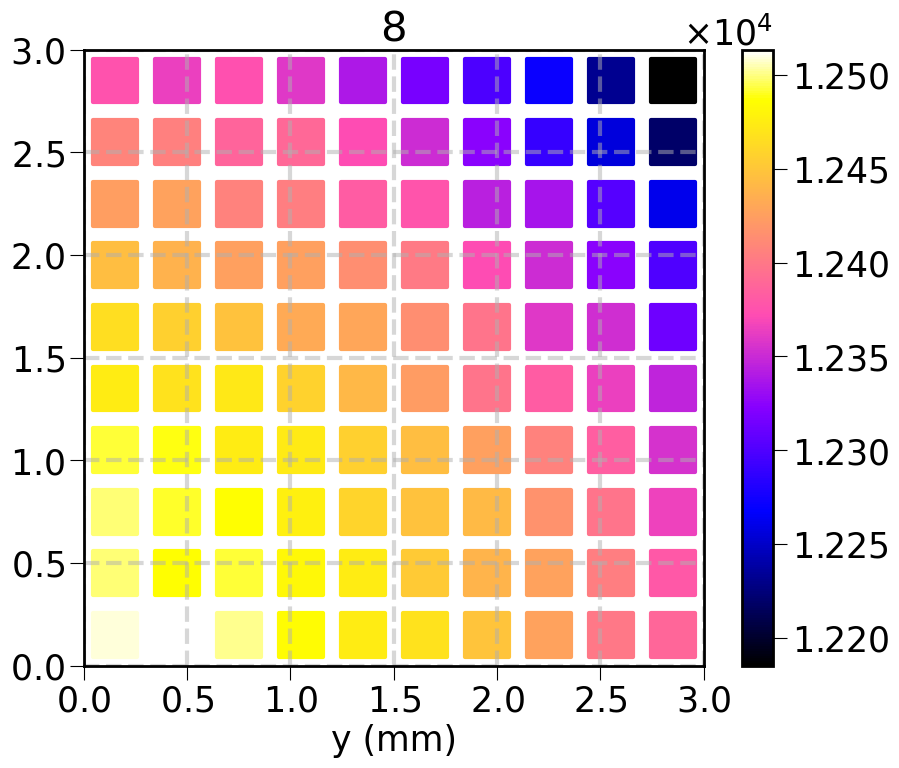

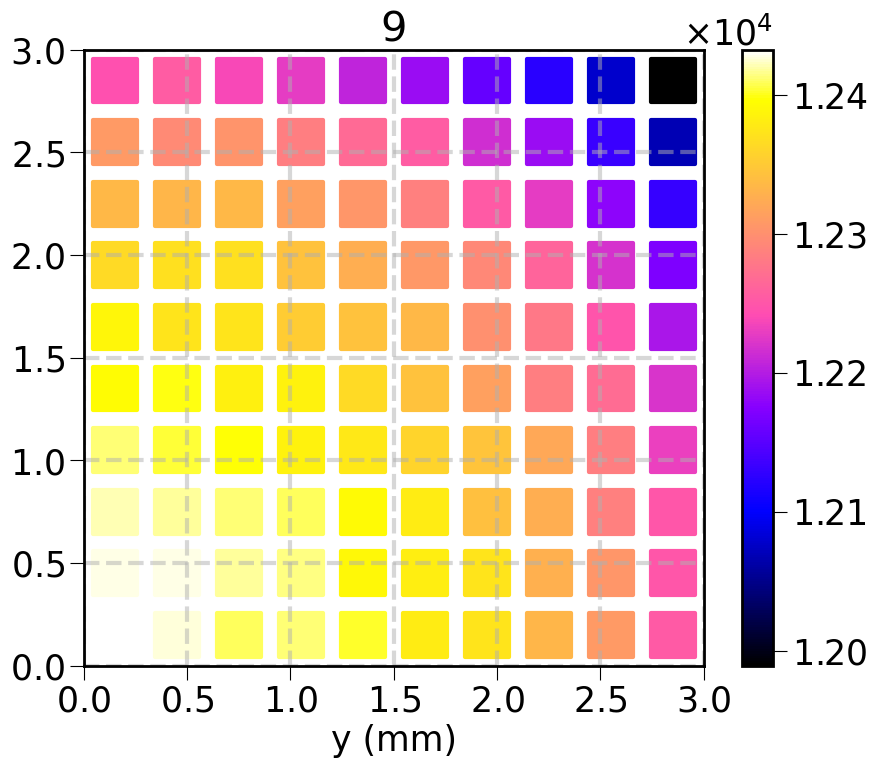

In [11]:
for zbin, df in binned.groupby("z_bin"):
    plt.figure()
    plt.scatter(df.x, df.y, c = df.sipm_0, s=1000, marker="s")
    plt.colorbar()
    plt.title(str(zbin))
    plt.xlabel("x (mm)")
    plt.xlabel("y (mm)")
    plt.xlim(0, 3)
    plt.xticks(np.arange(0, 3.1, 0.5))
    plt.ylim(0, 3)
    plt.yticks(np.arange(0, 3.1, 0.5))
    plt.grid()

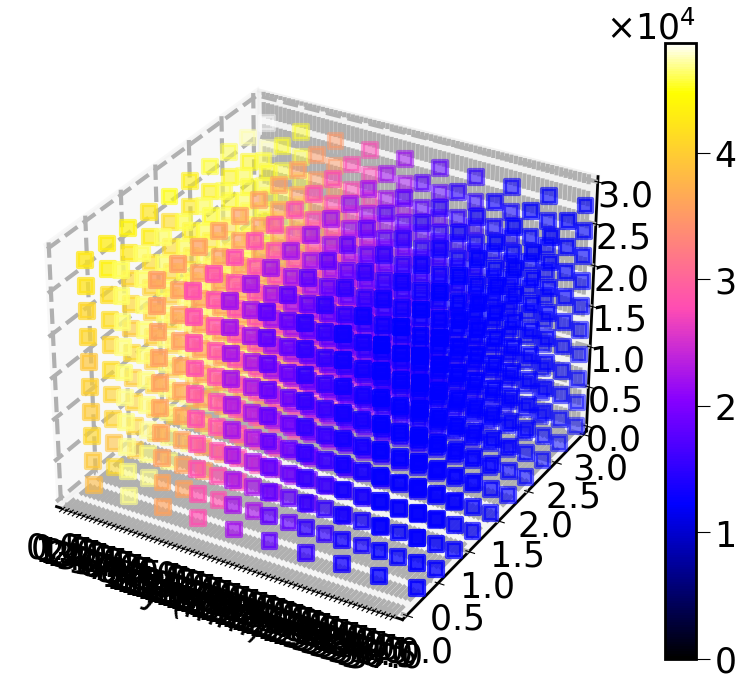

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plot = ax.scatter(binned.z, binned.x, binned.y, c = binned.sipm_0, s=100, marker="s", vmin=0)
plt.colorbar(plot)
ax.set_xlabel("z (mm)")
ax.set_xlabel("x (mm)")
ax.set_xlabel("y (mm)")
ax.set_xlim(0, 37.2)
ax.set_xticks(np.arange(0, 37.3, 0.5))
ax.set_ylim(0, 3)
ax.set_yticks(np.arange(0, 3.1, 0.5))
ax.set_zlim(0, 3)
ax.set_zticks(np.arange(0, 3.1, 0.5))
ax.grid()